<a href="https://colab.research.google.com/github/Mancydeep/Assessment-2-weatherwise-/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyinputplus matplotlib requests

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=b66974847ff4bd1b73f817e28efba0b98ad76685115df25988b27627e701c87e
  Stored in directory: /root/.cache/pip/wheels/85/81/c1/325c8199c5c4de8a0b9af900ff9cd8bd69853e3d9419493512
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=2f6b32dd1562b644ffefa5f580b79f062184182fbb10cd07930004ddf93ddd20
  Stored in directory: /root/.cache/pip/wheels/09/de/18/4dd2be0dbdf31870c6f0abde43b0de197b1c095655ad7da5c2
  Created wheel for stdiomask: filename=stdiomask

## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import pyinputplus as pyip

# Add any other setup code here

## 🌤️ Weather Data Functions

In [4]:
# Define get_weather_data() function here
def get_weather_data(location, forecast_days=3):
    """
    Obtain forecast details for a selected city and duration via wttr.in, limiting the days as recommended.
    """
    endpoint = f"https://wttr.in/{location}?format=j1"
    try:
        result = requests.get(endpoint)
        result.raise_for_status()
        data = result.json()
        data['weather'] = data['weather'][:forecast_days]
        return data
    except Exception as error:
        print(f"Unable to retrieve forecast: {error}")
        return None


## 📊 Visualisation Functions

In [5]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Display max & min temperatures as stacked horizontal bars with colors.
    """
    dates = []
    max_temps = []
    min_temps = []

    for day in weather_data['weather']:
        dates.append(day['date'])
        max_temps.append(float(day['maxtempC']))
        min_temps.append(float(day['mintempC']))

    plt.figure(figsize=(8, 5))
    y_pos = range(len(dates))

    # Plot min temp as bars, then add max-min stacked over it
    plt.barh(y_pos, min_temps, color='#82CFFD', label='Min Temp (°C)')
    max_min_diff = [max_temps[i] - min_temps[i] for i in range(len(max_temps))]
    plt.barh(y_pos, max_min_diff, left=min_temps, color='#FF6F61', label='Max Temp range')

    plt.yticks(y_pos, dates)
    plt.xlabel("Temperature (°C)")
    plt.title("Temperature Range per Day")
    plt.legend()
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



In [6]:
def create_precipitation_visualisation(weather_data, output_type='display'):
    dates = []
    totals = []

    for day in weather_data['weather']:
        dates.append(day['date'])
        total_rain = sum(float(hour['precipMM']) for hour in day['hourly'])
        totals.append(total_rain)

    x = np.arange(len(dates))
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(totals)))

    plt.figure(figsize=(8, 5))
    bars = plt.bar(x, totals, color=colors, edgecolor='black', linewidth=0.7, alpha=0.85, width=0.6)

    plt.xticks(x, dates, rotation=30)
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.title("Daily Rainfall Amount")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                 f'{height:.1f}', ha='center', va='bottom', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()


In [7]:
def create_humidity_visualisation(weather_data, output_type='display'):
    """
    Average humidity per day shown as a smooth gradient filled area chart.
    """
    dates = []
    avg_humidity = []

    for day in weather_data['weather']:
        dates.append(day['date'])
        humid_vals = [float(hour['humidity']) for hour in day['hourly']]
        avg = sum(humid_vals) / len(humid_vals)
        avg_humidity.append(avg)

    plt.figure(figsize=(8, 5))
    plt.plot(dates, avg_humidity, color='#388E3C', lw=2)

    # Color fill with gradient alpha
    for i in range(len(dates)-1):
        plt.fill_between(dates[i:i+2], avg_humidity[i:i+2], color='#A5D6A7', alpha=0.4*(i+1)/len(dates))

    plt.title("Average Daily Humidity")
    plt.xlabel("Date")
    plt.ylabel("Humidity (%)")
    plt.grid(alpha=0.4, linestyle='--')
    plt.tight_layout()
    plt.show()


## 🤖 Natural Language Processing

In [8]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Extracts city, feature, and day from a user's weather query.
    """
    question = question.lower()
    features = ['temperature', 'precipitation']
    time_markers = ['today', 'tomorrow', 'day after tomorrow']
    city = None
    focus = None
    day_ref = 'today'

    for f in features:
        if f in question:
            focus = f
            break
    for t in time_markers:
        if t in question:
            day_ref = t
            break

    parts = question.split()
    if 'in' in parts:
        idx = parts.index('in')
        if idx + 1 < len(parts):
            city = parts[idx + 1]
    else:
        city = 'Perth'
    return {'city': city, 'element': focus, 'period': day_ref}


## 🧩 Main Application Logic

In [9]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a text response for temperature, precipitation, or humidity forecast.
    """
    city = parsed_question.get('city', 'Unknown').title()
    element = parsed_question.get('element')
    period = parsed_question.get('period', 'today').lower()

    day_index = 0
    if period == 'tomorrow':
        day_index = 1
    elif period == 'day after tomorrow':
        day_index = 2

    try:
        day = weather_data['weather'][day_index]
        if element in [None, 'temperature']:
            high = day.get('maxtempC')
            low = day.get('mintempC')
            return f"In {city} on {day['date']}, temperatures will range between {low}°C and {high}°C."
        elif element in ['precipitation', 'rain']:
            total_rain = sum(float(hour['precipMM']) for hour in day['hourly'])
            return f"In {city} on {day['date']}, total precipitation is expected to be {total_rain:.1f} mm."
        elif element == 'humidity':
            avg_humidity = sum(float(hour['humidity']) for hour in day['hourly']) / len(day['hourly'])
            return f"In {city} on {day['date']}, average humidity will be {avg_humidity:.1f}%."
        else:
            return "Sorry, only temperature, precipitation, and humidity data are supported."
    except (IndexError, KeyError, TypeError):
        return "Sorry, weather data is not available for the requested time."


## 🧭 User Interface

In [12]:
# Define menu functions using pyinputplus or ipywidgets here
def weather_menu():
    print("=== Weather Hub ===")
    print("\nChoose an option below:")
    print("1 - Ask Weather Question")
    print("2 - Temperature Chart")
    print("3 - Precipitation Chart")
    print("4 - Humidity Chart")
    print("5 - Exit")

    choice = pyip.inputChoice(['1', '2', '3', '4', '5'], prompt="Enter your option (1-5): ")

    if choice == '5':
        print("Thank you for using Weather Hub! Goodbye.")
        return

    city = pyip.inputStr(prompt="Enter your city name: ")
    data = get_weather_data(city, forecast_days=3)
    if not data:
        print("Weather data unavailable. Please try again.")
        weather_menu()  # recursive call to reload menu
        return

    if choice == '1':
        question = pyip.inputStr(prompt="Type your weather question: ")
        parsed = parse_weather_question(question)
        parsed['city'] = city
        print(generate_weather_response(parsed, data))
    elif choice == '2':
        create_temperature_visualisation(data)
    elif choice == '3':
        create_precipitation_visualisation(data)
    elif choice == '4':
        create_humidity_visualisation(data)

    # Recursive call to keep showing menu after each action
    weather_menu()








=== Weather Hub ===

Choose an option below:
1 - Ask Weather Question
2 - Temperature Chart
3 - Precipitation Chart
4 - Humidity Chart
5 - Exit
Enter your option (1-5): 3
Enter your city name: Perth


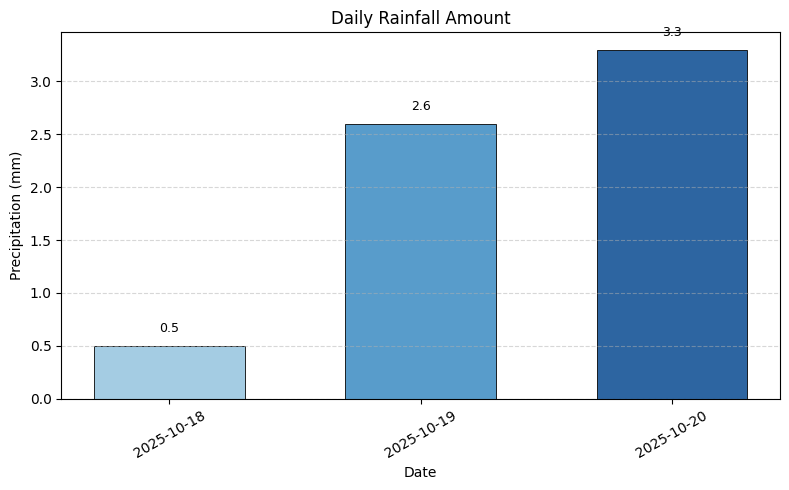

=== Weather Hub ===

Choose an option below:
1 - Ask Weather Question
2 - Temperature Chart
3 - Precipitation Chart
4 - Humidity Chart
5 - Exit
Enter your option (1-5): 2
Enter your city name: Sydney


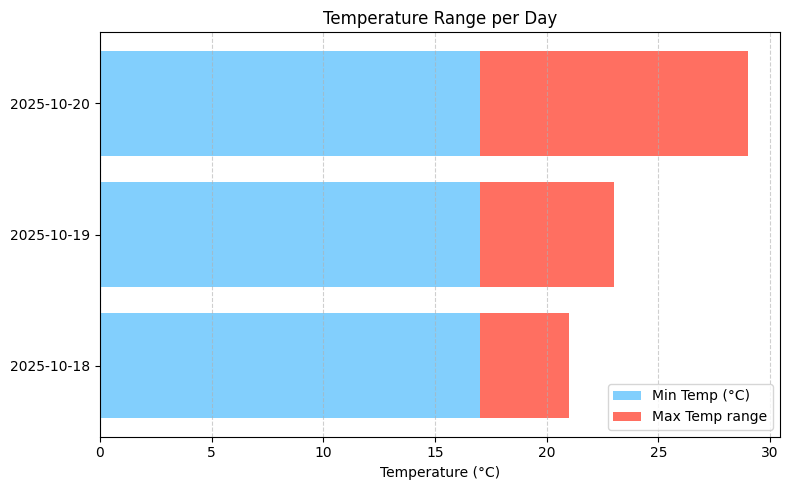

=== Weather Hub ===

Choose an option below:
1 - Ask Weather Question
2 - Temperature Chart
3 - Precipitation Chart
4 - Humidity Chart
5 - Exit
Enter your option (1-5): 1
Enter your city name: Perth
Type your weather question: Rain in perth today
In Perth on 2025-10-18, temperatures will range between 16°C and 18°C.
=== Weather Hub ===

Choose an option below:
1 - Ask Weather Question
2 - Temperature Chart
3 - Precipitation Chart
4 - Humidity Chart
5 - Exit
Enter your option (1-5): 4
Enter your city name: Perth


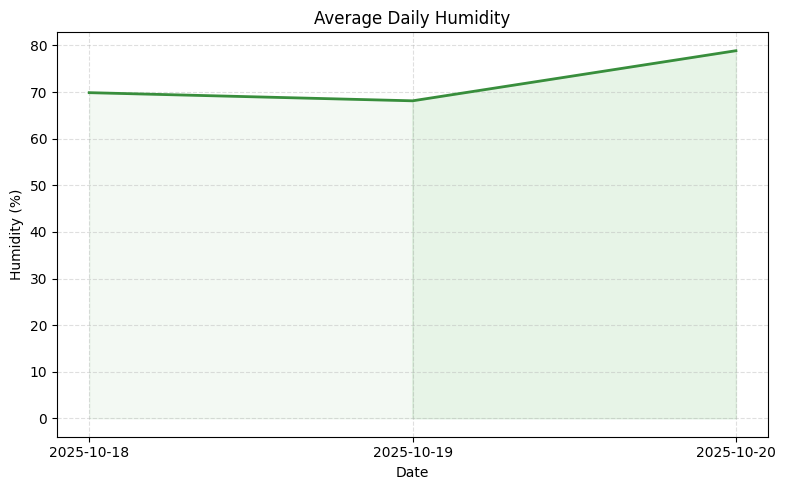

=== Weather Hub ===

Choose an option below:
1 - Ask Weather Question
2 - Temperature Chart
3 - Precipitation Chart
4 - Humidity Chart
5 - Exit
Enter your option (1-5): 5
Thank you for using Weather Hub! Goodbye.


In [13]:
# Initial call to start menu
weather_menu()

## 🧪 Testing and Examples

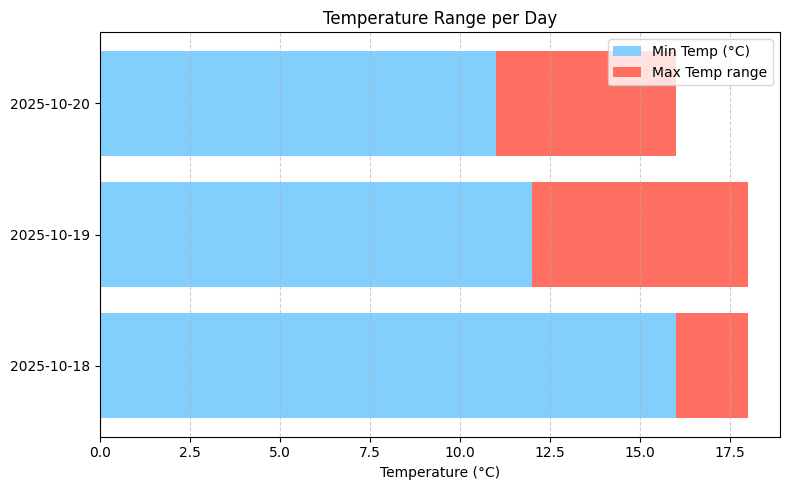

In [14]:
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Display max & min temperatures as stacked horizontal bars with colors.
    """
    dates = []
    max_temps = []
    min_temps = []

    for day in weather_data['weather']:
        dates.append(day['date'])
        max_temps.append(float(day['maxtempC']))
        min_temps.append(float(day['mintempC']))

    plt.figure(figsize=(8, 5))
    y_pos = range(len(dates))

    # Plot min temp as bars, then add max-min stacked over it
    plt.barh(y_pos, min_temps, color='#82CFFD', label='Min Temp (°C)')
    max_min_diff = [max_temps[i] - min_temps[i] for i in range(len(max_temps))]
    plt.barh(y_pos, max_min_diff, left=min_temps, color='#FF6F61', label='Max Temp range')

    plt.yticks(y_pos, dates)
    plt.xlabel("Temperature (°C)")
    plt.title("Temperature Range per Day")
    plt.legend()
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
weather_data = get_weather_data("Perth",3)
create_temperature_visualisation(weather_data)

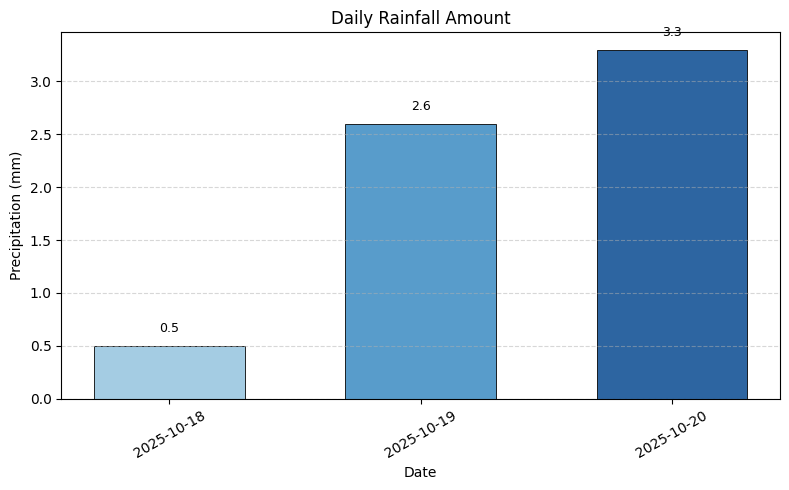

In [16]:
def create_precipitation_visualisation(weather_data, output_type='display'):
    dates = []
    totals = []

    for day in weather_data['weather']:
        dates.append(day['date'])
        total_rain = sum(float(hour['precipMM']) for hour in day['hourly'])
        totals.append(total_rain)

    x = np.arange(len(dates))
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(totals)))

    plt.figure(figsize=(8, 5))
    bars = plt.bar(x, totals, color=colors, edgecolor='black', linewidth=0.7, alpha=0.85, width=0.6)

    plt.xticks(x, dates, rotation=30)
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.title("Daily Rainfall Amount")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                 f'{height:.1f}', ha='center', va='bottom', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()
data = get_weather_data("Perth",3)
create_precipitation_visualisation(data)


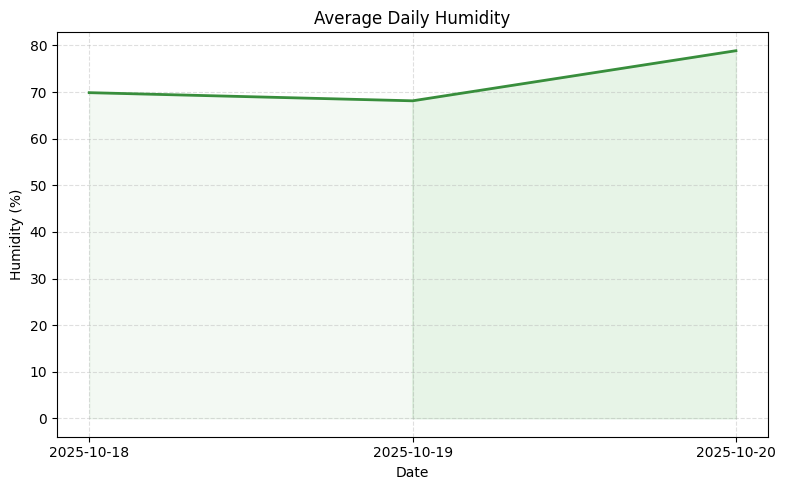

In [17]:
def create_humidity_visualisation(weather_data, output_type='display'):
    """
    Average humidity per day shown as a smooth gradient filled area chart.
    """
    dates = []
    avg_humidity = []

    for day in weather_data['weather']:
        dates.append(day['date'])
        humid_vals = [float(hour['humidity']) for hour in day['hourly']]
        avg = sum(humid_vals) / len(humid_vals)
        avg_humidity.append(avg)

    plt.figure(figsize=(8, 5))
    plt.plot(dates, avg_humidity, color='#388E3C', lw=2)

    # Color fill with gradient alpha
    for i in range(len(dates)-1):
        plt.fill_between(dates[i:i+2], avg_humidity[i:i+2], color='#A5D6A7', alpha=0.4*(i+1)/len(dates))

    plt.title("Average Daily Humidity")
    plt.xlabel("Date")
    plt.ylabel("Humidity (%)")
    plt.grid(alpha=0.4, linestyle='--')
    plt.tight_layout()
    plt.show()
data = get_weather_data("Perth",3)
create_humidity_visualisation(data)


## 🗂️ AI Prompting Log

---


Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.

https://github.com/Mancydeep/Assessment-2-weatherwise-/tree/main/ai-conversations